In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pickle

In [3]:
#mpl.rcsetup.interactive_bk
#mpl.rcsetup.non_interactive_bk
#mpl.rcsetup.all_backends

In [184]:
#filename = 'modeldata/mac_64_130000.pickle'
#filename = 'modeldata/mac75_128_130000.pickle'
filename = 'modeldata/lstm_64_30000.pickle'
with open(filename, 'rb') as f:
    train_losses_64, train_accs_64, test_accs_64 = pickle.load(f)
    #train_losses_64 = train_losses_64[::10]

filename = 'modeldata/lstm_128_30000.pickle'
with open(filename, 'rb') as f:
    train_losses_128, train_accs_128, test_accs_128 = pickle.load(f)
    #train_losses_128 = train_losses_128[::10]

In [185]:
def smooth(arr, interp):
    smooth_ret = []
    smooth_ret.append(arr[0])
    for i in range(1, len(arr)):
        smooth_ret.append(interp*smooth_ret[-1]+(1-interp)*arr[i])
    return smooth_ret

In [186]:
smooth_train_losses_64 = smooth(np.array(train_losses_64)[:,3], 0.9)
#smooth_train_losses = smooth(train_losses)
smooth_train_accs_64 = smooth(train_accs_64, 0.999)

smooth_train_losses_128 = smooth(np.array(train_losses_128)[:,3], 0.9)
#smooth_train_losses = smooth(train_losses)
smooth_train_accs_128 = smooth(train_accs_128, 0.999)

print("64", test_accs_64[-1])
print("128", test_accs_128[-1])

smooth_train_losses_64_0 = smooth(np.array(train_losses_64)[:,0], 0.9)

64 0.83425
128 0.83525


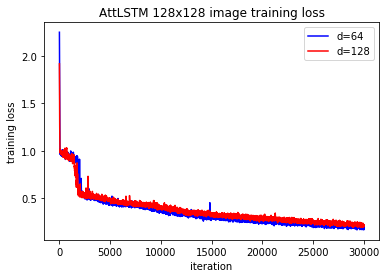

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000]


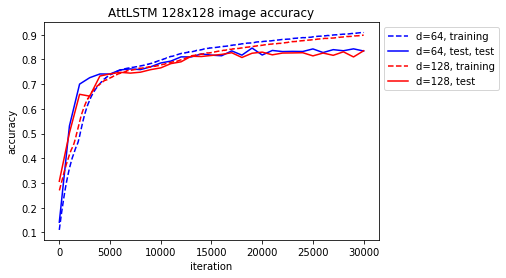

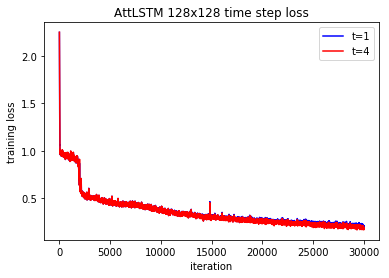

In [188]:
plt.title('AttLSTM 128x128 image training loss')
plt.ylabel('training loss')
plt.xlabel('iteration')
plt.plot(smooth_train_losses_64, 'b-')
plt.plot(smooth_train_losses_128, 'r-')
legend = [
    mlines.Line2D([], [], color='blue', label='d=64'),
    mlines.Line2D([], [], color='red', label='d=128')
]
plt.legend(bbox_to_anchor=(1, 1), handles=legend)
plt.show()

#legend = 
plt.title('AttLSTM 128x128 image accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
test_its = np.arange(len(test_accs_64)) * 1000
print(test_its)
plt.plot(smooth_train_accs_64, 'b--')
#plt.plot(train_accs_64, 'b--', alpha=0.1)
plt.plot(test_its, test_accs_64, 'b-')

plt.plot(smooth_train_accs_128, 'r--')
#plt.plot(train_accs_128, 'r--', alpha=0.1)
plt.plot(test_its, test_accs_128, 'r-')

legend = [
    mlines.Line2D([], [], color='blue', label='d=64, training', linestyle='dashed'),
    mlines.Line2D([], [], color='blue', label='d=64, test, test'),
    mlines.Line2D([], [], color='red', label='d=128, training', linestyle='dashed'),
    mlines.Line2D([], [], color='red', label='d=128, test')
]
plt.legend(bbox_to_anchor=(1, 1), handles=legend)
plt.show()

plt.title('AttLSTM 128x128 time step loss')
plt.ylabel('training loss')
plt.xlabel('iteration')
plt.plot(smooth_train_losses_64_0, 'b-')
plt.plot(smooth_train_losses_64_4, 'r-')
legend = [
    mlines.Line2D([], [], color='blue', label='t=1'),
    mlines.Line2D([], [], color='red', label='t=4')
]
plt.legend(bbox_to_anchor=(1, 1), handles=legend)
plt.show()

In [157]:
#filename = 'modeldata/mac_64_130000.pickle'
#filename = 'modeldata/mac75_128_130000.pickle'
filename = 'modeldata/mac_64_60000.pickle'
with open(filename, 'rb') as f:
    train_losses_64, train_accs_64, test_accs_64 = pickle.load(f)
    #train_losses_64 = train_losses_64[::10]

filename = 'modeldata/mac_128_60000.pickle'
with open(filename, 'rb') as f:
    train_losses_128, train_accs_128, test_accs_128 = pickle.load(f)
    #train_losses_128 = train_losses_128[::10]

In [158]:
#smooth_train_losses_64 = smooth(np.array(train_losses_64)[:,0], 0.9)
smooth_train_losses_64 = smooth(train_losses_64, 0.9)
smooth_train_accs_64 = smooth(train_accs_64, 0.999)

#smooth_train_losses_128 = smooth(np.array(train_losses_128)[:,0], 0.9)
smooth_train_losses_128 = smooth(train_losses_128, 0.9)
smooth_train_accs_128 = smooth(train_accs_128, 0.999)

print("64", test_accs_64[-1])
print("128", test_accs_128[-1])

64 0.7245
128 0.457


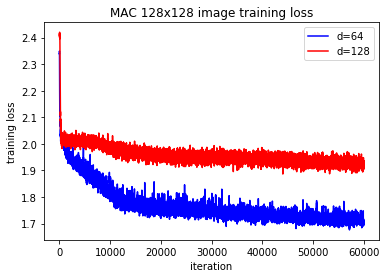

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000
 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000
 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000
 60000]


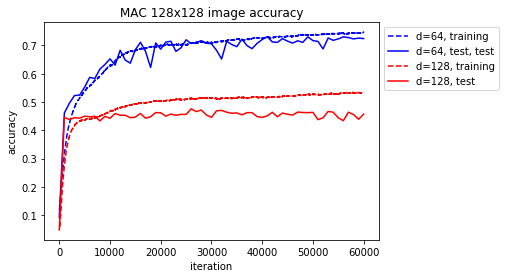

In [159]:
plt.title('MAC 128x128 image training loss')
plt.ylabel('training loss')
plt.xlabel('iteration')
plt.plot(smooth_train_losses_64, 'b-')
plt.plot(smooth_train_losses_128, 'r-')
legend = [
    mlines.Line2D([], [], color='blue', label='d=64'),
    mlines.Line2D([], [], color='red', label='d=128')
]
plt.legend(bbox_to_anchor=(1, 1), handles=legend)
plt.show()

#legend = 
plt.title('MAC 128x128 image accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
test_its = np.arange(len(test_accs_64)) * 1000
print(test_its)
plt.plot(smooth_train_accs_64, 'b--')
#plt.plot(train_accs_64, 'b--', alpha=0.1)
plt.plot(test_its, test_accs_64, 'b-')

plt.plot(smooth_train_accs_128, 'r--')
#plt.plot(train_accs_128, 'r--', alpha=0.1)
plt.plot(test_its, test_accs_128, 'r-')

legend = [
    mlines.Line2D([], [], color='blue', label='d=64, training', linestyle='dashed'),
    mlines.Line2D([], [], color='blue', label='d=64, test, test'),
    mlines.Line2D([], [], color='red', label='d=128, training', linestyle='dashed'),
    mlines.Line2D([], [], color='red', label='d=128, test')
]
plt.legend(bbox_to_anchor=(1, 1), handles=legend)
plt.show()

In [ ]:
#filename = 'modeldata/mac_64_130000.pickle'
#filename = 'modeldata/mac75_128_130000.pickle'
filename = 'modeldata/mac75_64_60000.pickle'
with open(filename, 'rb') as f:
    train_losses_64, train_accs_64, test_accs_64 = pickle.load(f)
    #train_losses_64 = train_losses_64[::10]

filename = 'modeldata/mac75_128_60000.pickle'
with open(filename, 'rb') as f:
    train_losses_128, train_accs_128, test_accs_128 = pickle.load(f)
    #train_losses_128 = train_losses_128[::10]

In [ ]:
#smooth_train_losses_64 = smooth(np.array(train_losses_64)[:,0], 0.9)
smooth_train_losses_64 = smooth(train_losses_64, 0.99)
smooth_train_accs_64 = smooth(train_accs_64, 0.999)

#smooth_train_losses_128 = smooth(np.array(train_losses_128)[:,0], 0.9)
smooth_train_losses_128 = smooth(train_losses_128, 0.99)
smooth_train_accs_128 = smooth(train_accs_128, 0.999)

print("64", test_accs_64[-1])
print("128", test_accs_128[-1])

In [ ]:
plt.title('MAC 75x75 image training loss')
plt.ylabel('training loss')
plt.xlabel('iteration')
plt.plot(smooth_train_losses_64, 'b-')
plt.plot(smooth_train_losses_128, 'r-')
legend = [
    mlines.Line2D([], [], color='blue', label='d=64'),
    mlines.Line2D([], [], color='red', label='d=128')
]
plt.legend(bbox_to_anchor=(1, 1), handles=legend)
plt.show()

#legend = 
plt.title('MAC 75x75 image accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
test_its = np.arange(len(test_accs_64)) * 1000
print(test_its)
plt.plot(smooth_train_accs_64, 'b--')
#plt.plot(train_accs_64, 'b--', alpha=0.1)
plt.plot(test_its, test_accs_64, 'b-')

plt.plot(smooth_train_accs_128, 'r--')
#plt.plot(train_accs_128, 'r--', alpha=0.1)
plt.plot(test_its, test_accs_128, 'r-')

legend = [
    mlines.Line2D([], [], color='blue', label='d=64, training', linestyle='dashed'),
    mlines.Line2D([], [], color='blue', label='d=64, test, test'),
    mlines.Line2D([], [], color='red', label='d=128, training', linestyle='dashed'),
    mlines.Line2D([], [], color='red', label='d=128, test')
]
plt.legend(bbox_to_anchor=(1, 1), handles=legend)
plt.show()

In [189]:
#filename = 'modeldata/mac_64_130000.pickle'
#filename = 'modeldata/mac75_128_130000.pickle'
filename = 'modeldata/lstm75_64_30000.pickle'
with open(filename, 'rb') as f:
    train_losses_64, train_accs_64, test_accs_64 = pickle.load(f)
    #train_losses_64 = train_losses_64[::10]

filename = 'modeldata/lstm75_128_30000.pickle'
with open(filename, 'rb') as f:
    train_losses_128, train_accs_128, test_accs_128 = pickle.load(f)
    #train_losses_128 = train_losses_128[::10]

In [190]:
smooth_train_losses_64 = smooth(np.array(train_losses_64)[:,3], 0.9)
#smooth_train_losses_64 = smooth(train_losses_64, 0.99)
smooth_train_accs_64 = smooth(train_accs_64, 0.999)

smooth_train_losses_128 = smooth(np.array(train_losses_128)[:,3], 0.9)
#smooth_train_losses_128 = smooth(train_losses_128, 0.99)
smooth_train_accs_128 = smooth(train_accs_128, 0.999)

print("64", test_accs_64[-1])
print("128", test_accs_128[-1])

64 0.46225
128 0.7795


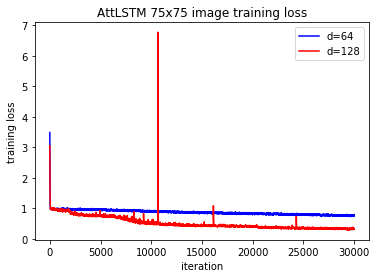

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000]


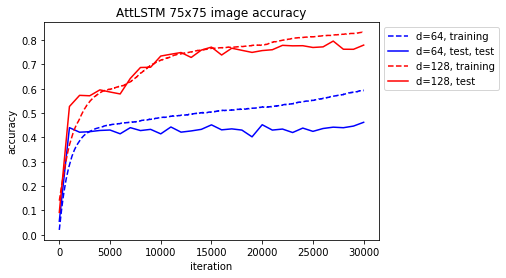

In [192]:
plt.title('AttLSTM 75x75 image training loss')
plt.ylabel('training loss')
plt.xlabel('iteration')
plt.plot(smooth_train_losses_64, 'b-')
plt.plot(smooth_train_losses_128, 'r-')
legend = [
    mlines.Line2D([], [], color='blue', label='d=64'),
    mlines.Line2D([], [], color='red', label='d=128')
]
plt.legend(bbox_to_anchor=(1, 1), handles=legend)
plt.show()

#legend = 
plt.title('AttLSTM 75x75 image accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
test_its = np.arange(len(test_accs_64)) * 1000
print(test_its)
plt.plot(smooth_train_accs_64, 'b--')
#plt.plot(train_accs_64, 'b--', alpha=0.1)
plt.plot(test_its, test_accs_64, 'b-')

plt.plot(smooth_train_accs_128, 'r--')
#plt.plot(train_accs_128, 'r--', alpha=0.1)
plt.plot(test_its, test_accs_128, 'r-')

legend = [
    mlines.Line2D([], [], color='blue', label='d=64, training', linestyle='dashed'),
    mlines.Line2D([], [], color='blue', label='d=64, test, test'),
    mlines.Line2D([], [], color='red', label='d=128, training', linestyle='dashed'),
    mlines.Line2D([], [], color='red', label='d=128, test')
]
plt.legend(bbox_to_anchor=(1, 1), handles=legend)
plt.show()